Importing necessary data analysis/processing tools

In [15]:
import os
import pandas as pd
pd.set_option('display.max_rows', None) 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

Loading our dataset into a Dataframe `df`.

In [16]:
df = pd.read_csv('FINAL.csv', header = 0)

Inspecting the Data we collected  

1) Size of our dataset
2) Displaying our column names
3) Display first few rows of our data


In [17]:
print(df.shape)
print(df.columns)
df.head(10)


(17673, 62)
Index(['user_id', 'user_win_rate', 'user_lose_rate', 'user_draw_rate',
       'user_game_count', 'user_blitz_rating', 'user_rating_bin',
       'user_white_win_rate', 'user_white_lose_rate', 'user_white_draw_rate',
       'user_white_game_count', 'user_black_win_rate', 'user_black_lose_rate',
       'user_black_draw_rate', 'user_black_game_count', 'user_top_eco',
       'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco',
       'user_mate_winrate', 'user_resign_winrate', 'user_time_winrate',
       'user_mate_lossrate', 'user_resign_lossrate', 'user_time_lossrate',
       'user_average_game_len', 'user_rating_deviation',
       'user_blitz_total_games', 'user_best_win_1', 'user_best_win_2',
       'user_best_win_3', 'op_id', 'op_win_rate', 'op_lose_rate',
       'op_draw_rate', 'op_game_count', 'op_blitz_rating', 'op_white_win_rate',
       'op_white_lose_rate', 'op_white_draw_rate', 'op_white_game_count',
       'op_black_win_rate', 'op_black_lose_rate', 

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,...,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,...,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,...,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,...,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,...,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,...,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,...,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,...,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,...,0.103,0.397,0.466,495.0,45.08,17543.0,1955.0,1941.0,1929.0,0.0
8,Deku5855,40.0,57.0,2.0,100.0,703.0,700-719,52.381,47.619,0.000,...,0.580,0.406,0.014,490.0,59.36,215.0,870.0,863.0,835.0,-1.0
9,aissik,38.0,54.0,8.0,100.0,1371.0,1360-1379,47.619,50.794,1.587,...,0.296,0.519,0.185,395.0,45.11,35793.0,1645.0,1643.0,1633.0,1.0


Identifying missingness: If we have 0 in game_count for a user, we have missing values and should drop it

In [18]:
zero_count = (df == 0).sum()
zero_count

user_id                       0
user_win_rate               762
user_lose_rate              373
user_draw_rate             4194
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate         386
user_white_lose_rate        189
user_white_draw_rate       2945
user_white_game_count       127
user_black_win_rate         403
user_black_lose_rate        188
user_black_draw_rate       2930
user_black_game_count       131
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate           520
user_resign_winrate         513
user_time_winrate           703
user_mate_lossrate          421
user_resign_lossrate        635
user_time_lossrate         1238
user_average_game_len        58
user_rating_deviation         0
user_blitz_total_games       20
user_best_win_1             633
user_best_win_2             633
user_best_win_3             633
op_id   

In [19]:
df = df.dropna()
game_counts = [
    'user_game_count',
    'op_game_count',
    'user_blitz_total_games',
    'op_blitz_total_games'
]
for column in game_counts:
    df = df[df[column] >= 10]
    


We can see that there are many fields that contain 0 values. For some columns, we know that having a significant number of 0 values in their columns is a bad sign because when the lichess api breaks sometimes it imputs all 0's into the dataset. We should drop some of the rows containing the these values. For observation purposes we will draw out a few plots before cleaning the data.

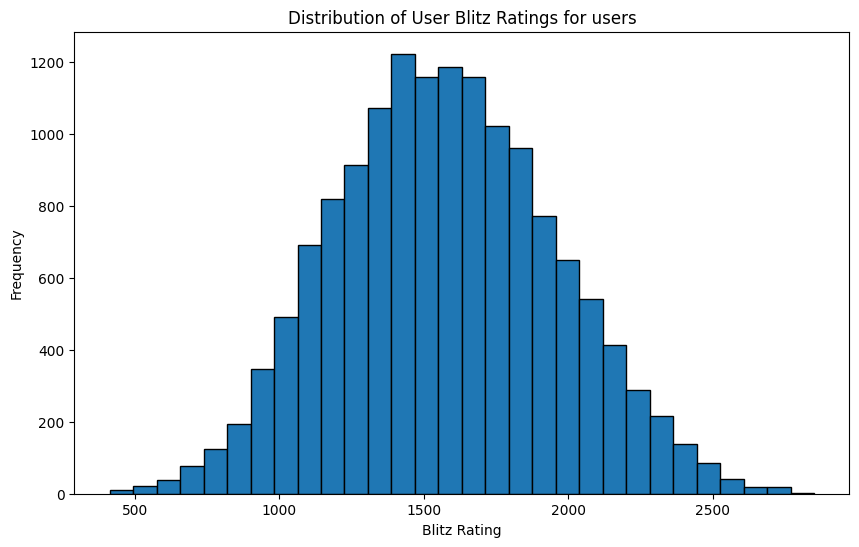

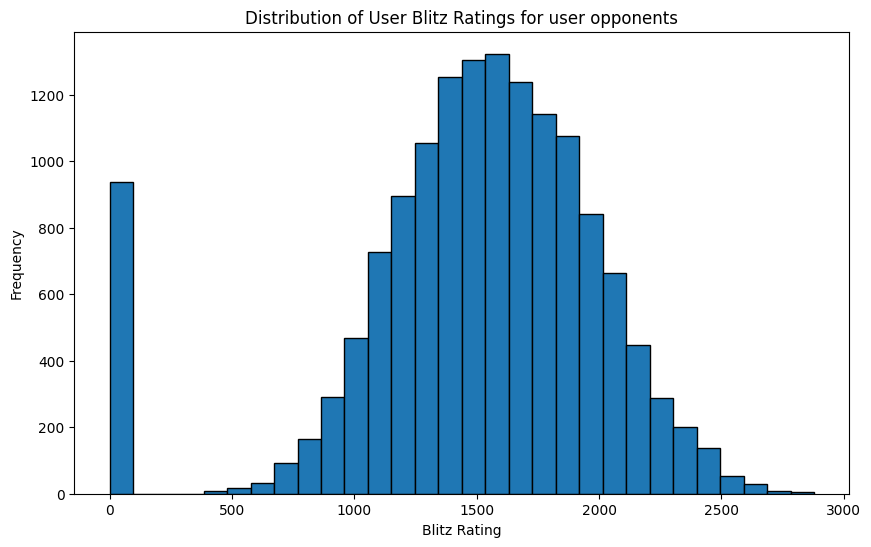

In [20]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [21]:
df.shape

(14692, 62)

In [22]:
game_0s = [
    'user_win_rate',
    'user_lose_rate',
    'user_mate_winrate',
    'user_mate_lossrate',
    'op_win_rate',
    'op_lose_rate',
    'op_mate_winrate',
    'op_mate_lossrate',
    'op_blitz_rating'
    
]
for column in game_0s:
    df = df[df[column] != 0]
 

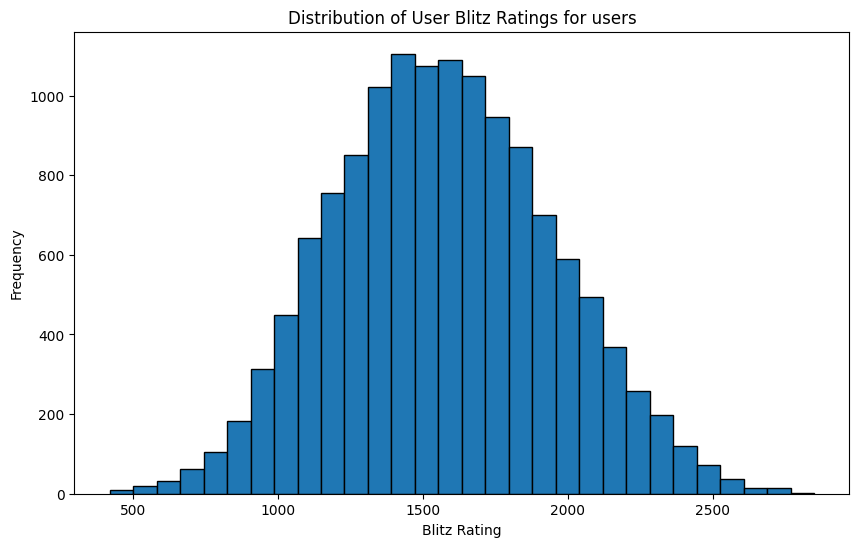

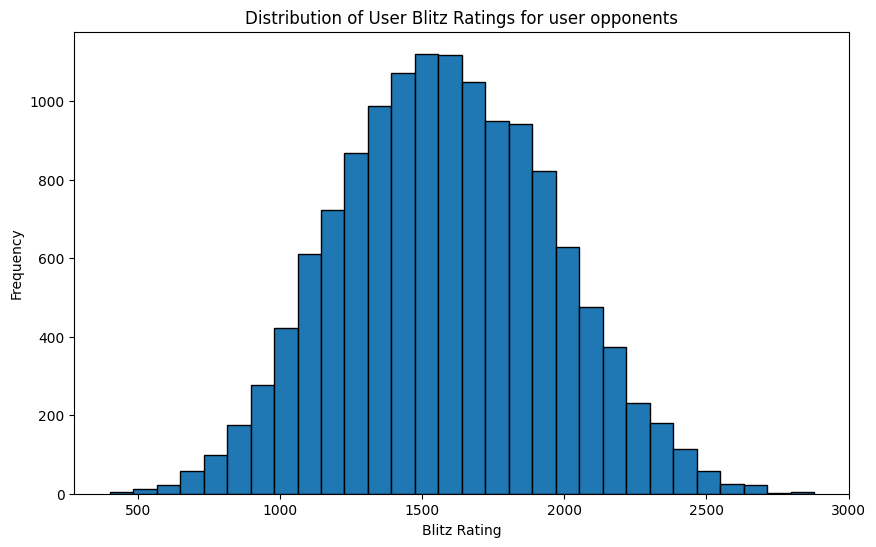

In [23]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [24]:
print(df.shape)
zero_count = (df == 0).sum()
print(zero_count)

(13450, 62)
user_id                       0
user_win_rate                 0
user_lose_rate                0
user_draw_rate             1963
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate           7
user_white_lose_rate          1
user_white_draw_rate       1746
user_white_game_count         0
user_black_win_rate          10
user_black_lose_rate          1
user_black_draw_rate       1683
user_black_game_count         0
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate             0
user_resign_winrate          42
user_time_winrate            85
user_mate_lossrate            0
user_resign_lossrate        245
user_time_lossrate          594
user_average_game_len         0
user_rating_deviation         0
user_blitz_total_games        0
user_best_win_1              85
user_best_win_2              85
user_best_win_3             

In [25]:
best_games = [
    'op_best_win_1',
    'op_best_win_2',
    'op_best_win_3',
    'user_best_win_1',
    'user_best_win_2',
    'user_best_win_3'
    
]
for column in game_0s:
    df = df[df[column] != 0]

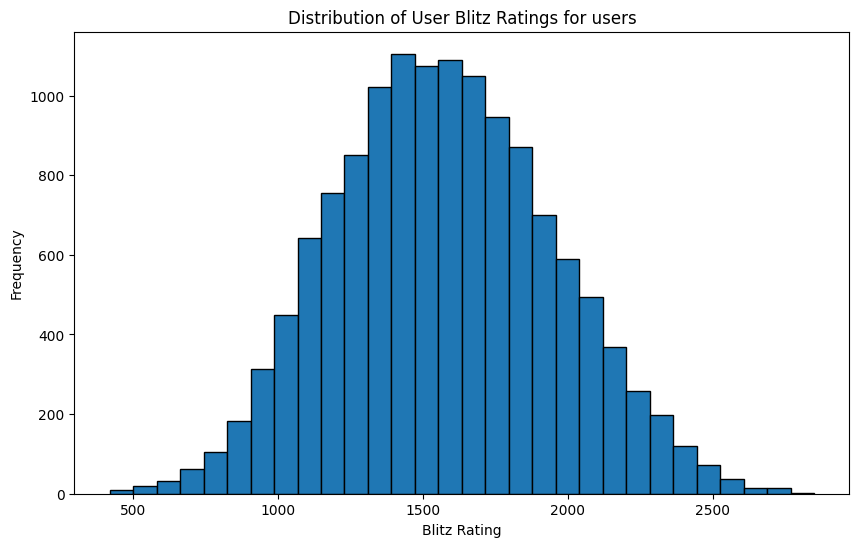

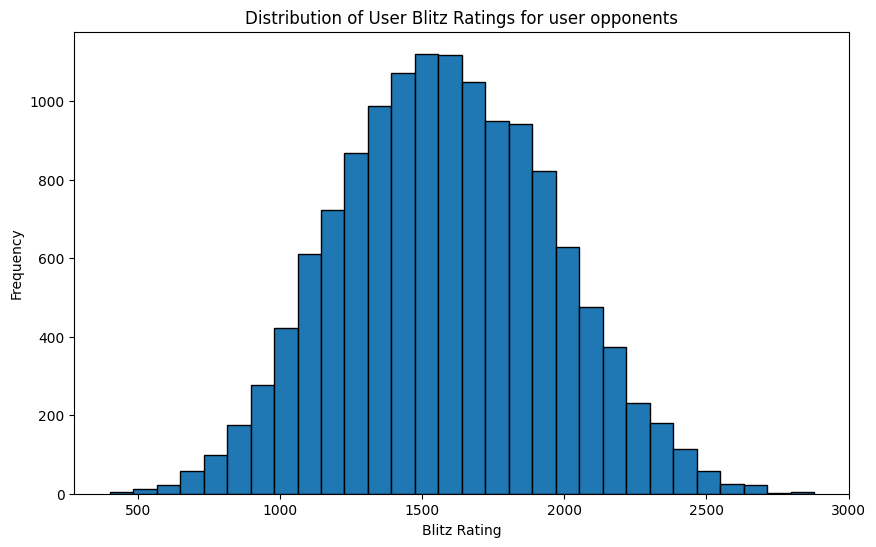

In [26]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

We can see that the distribution is quite similar. In particular we have spikes in fetching users with ratings of around 1500. In addition it seems we have some outliers in out data.

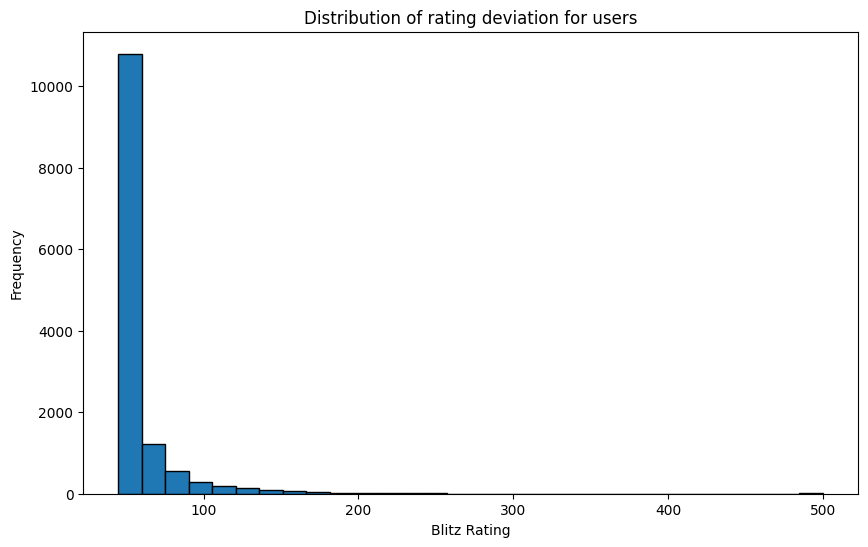

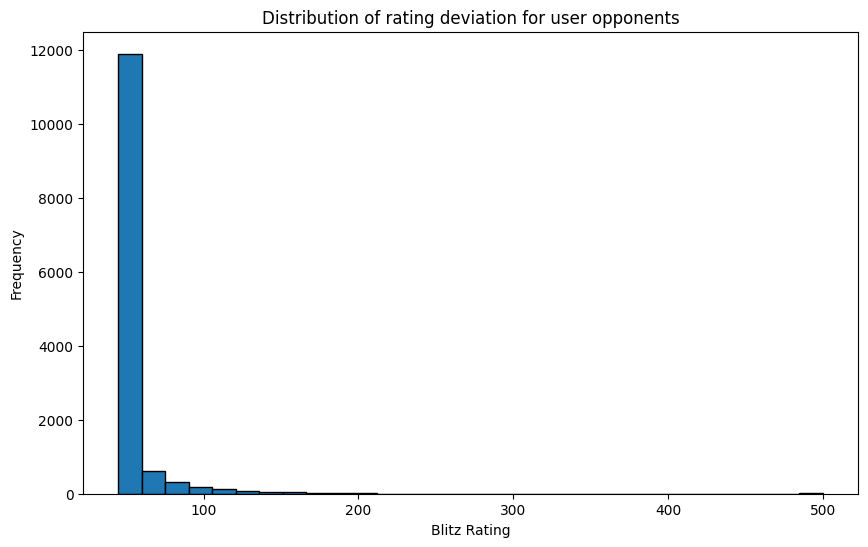

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

When the rating deviation is around 45, we know the user has a relatively stable rating, from the graph we can see that most users in our dataset has a stable rating. The only thing we have to consider is the outliers of rating deviation at 0 and at 500. These data points will be dropped.

Now for some actual data cleaning.

1) Remove null values.
2) Remove all games, and sub-categories of the games that have counts of 0.
3) If the total number of games played by a user is less than 10, they aren't active enough in the game time control style. Thus they will be removed too.
4) Rating deviation outliers will be removed.

Lets re-visualize our data now

In [ ]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.kdeplot(df['user_win_rate'], label='User Blitz Rating', bw_adjust=0.5)
sns.kdeplot(df['op_win_rate'], label='Opponent Blitz Rating', bw_adjust=0.5)

# Add more columns as needed
# sns.kdeplot(df['another_column'], label='Another Rating', bw_adjust=0.5)

# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

This indicates that indeed for the most part, players are matched against players in their own rating bracket so our data collection was effective.

In [ ]:
sns.kdeplot(df['user_white_win_rate'], label='User white win rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_win_rate'], label='User opponent black win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

Seems that players playing white has a higher win rate than those playing black.

In [ ]:
sns.kdeplot(df['user_white_draw_rate'], label='User white draw rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_draw_rate'], label='User opponent draw win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

Seems like the draw rate is the same, so it is probably safe to say that players playing either color have an equal chance of drawing.

In [ ]:
relevant_features = [
    'user_black_game_count', 'user_black_draw_rate', 'user_black_win_rate',
    'user_blitz_rating', 'user_draw_rate', 'user_game_count', 'user_highest_blitz_opponent_rating',
    'user_win_rate', 'user_rating_deviation', 'user_total_games_played',
    'user_white_draw_rate', 'user_white_game_count', 'user_white_win_rate',
    'op_black_game_count', 'op_black_draw_rate', 'op_black_win_rate',
    'op_blitz_rating', 'op_draw_rate', 'op_game_count', 'op_highest_blitz_opponent_rating',
    'op_win_rate', 'op_rating_deviation', 'op_total_games_played',
    'op_white_draw_rate', 'op_white_game_count', 'op_white_win_rate', 'game_result'
]
df_relevant = df[relevant_features]

# Display basic information about the relevant data
print("Basic Information:")
print(df_relevant.info())
print("\n")

# Generate summary statistics for numerical columns
print("Summary Statistics:")
print(df_relevant.describe())
print("\n")

# Calculate average for each numerical column
averages = df_relevant.mean()
print("Averages for each column:")
print(averages)
print("\n")

# Generate correlation matrix for the dataset
correlation_matrix = df_relevant.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Display the correlation matrix as a heatmap with better readability
plt.figure(figsize=(18, 16))  # Increase figure size for readability
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    annot_kws={"size": 8}  # Set annotation font size
)

# Rotate labels for readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=14)

# Show the plot
plt.show()

Checking correlation between features. If there's high correlation, we drop them becuase they likely contribute the same type of info.

For this intermediate report we haven't gotten to analyzing correlated features to drop yet, but we plan to.

In [ ]:
df.to_csv('cleaned.csv', index = False)

Our first model: KNN

In [ ]:
import pandas as pd
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('./data.csv')

# our features
X = data.drop(columns=['game_result', 'user_id', 'user_op'])

#our label
y = data.iloc[:, -1]   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [10, 50],          # Two choices for number of neighbors
    'weights': ['uniform', 'distance']  # Two choices for weighting
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Our Second Model: Random Forest

In [ ]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('data.csv')

# our features
X = data.drop(columns=['game_result', 'user_id', 'user_op'])

#our label
y = data.iloc[:, -1]   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 20]       # Maximum depth of the trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)